In [188]:
%pylab inline

import zap_util as z

import statsmodels.api as sm
import statsmodels.formula.api as smf
rmse = {}
z.set_style()

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [189]:
reload(z)
df = z.get_imoveis_dataframe()
# Variáveis que possuem valores nulos.
null = df.isnull().sum()
null[null > 0]

condominio     6939
garagem       11416
suites        21992
andar         41467
elevadores    13873
ano           43464
unidades      48198
dtype: int64

In [190]:
# Esse tratamento pode ser feito no método "z.get_imoveis_dataframe()"
# com o parâmetro "with_missing_data" configurado para False.
df.condominio.fillna(0, inplace=True)
df.garagem.fillna(0, inplace=True)
df.suites.fillna(0, inplace=True)
del df['elevadores'],df['andar'],df['ano'],df['unidades']
null = df.isnull().sum()
null[null > 0]

Series([], dtype: int64)

In [191]:
g = df[['preco','m2','bairro_g']].groupby('bairro_g')

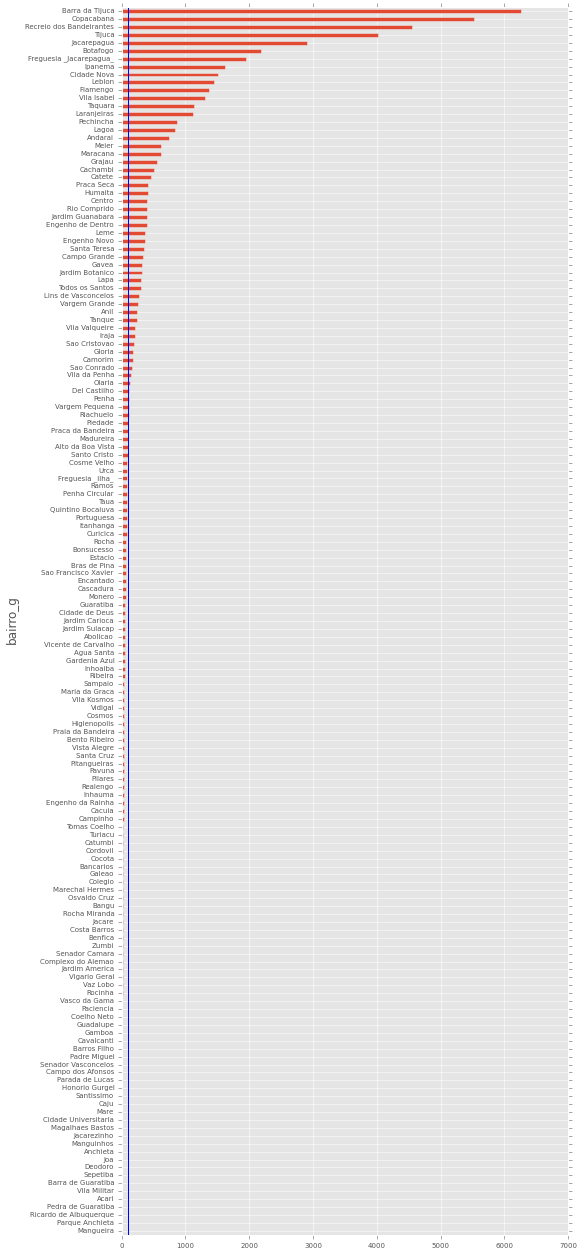

In [192]:
# Plot de número de imóveis por bairro, em ordem de n˚ de imóveis.
s = g.size()
s.sort(ascending=True)
s.plot(kind='barh', figsize=(8,22), fontsize=7);
axvline(x=100,color='b');

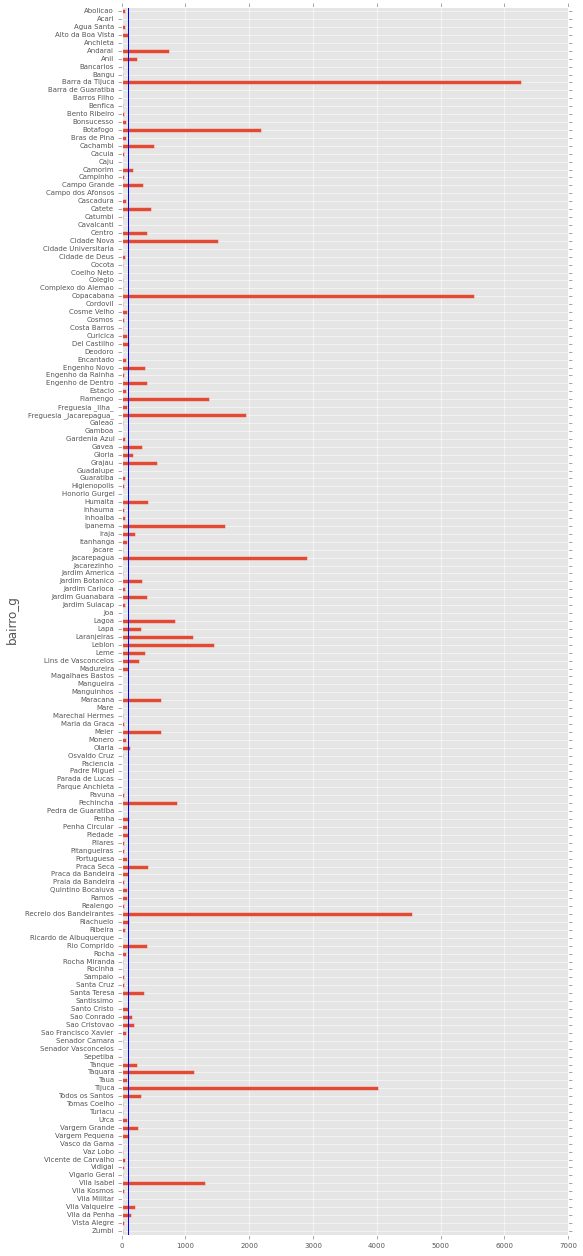

In [193]:
# Plot de número de imóveis por bairro, em ordem alfabética.

s = g.size()

ax = s.plot(kind='barh', figsize=(8,22), fontsize=7);
ax.invert_yaxis();
axvline(x=100, color='b');

In [194]:
f,_,e = z.prep_formula(df,'df', cat=['bairro_g','suites','quartos'])
print('Variáveis excluídas: ' + ','.join(e))
print( '\n')
print('Fórmula: '+ f)

Variáveis excluídas: id_bairro_g,preco,m2


Fórmula: df.preco  ~ df.dm_esquina + C(df.quartos) + df.dm_closet + df.dist_saude_privada + df.dm_armario + df.se_anos_estudo + df.dm_recuado + df.dm_fundos + df.dm_andar_alto + df.dm_mezanino + df.dm_piscina + df.dm_playground + df.dist_centro_lng + df.dm_hidrometro + df.lng + df.dm_seguranca + df.dist_trem + df.dist_lagoa + C(df.suites) + df.dm_sol_da_manha + df.area + df.dm_frente + df.dist_delegacia + df.dist_centro_lat + df.dm_blindex + df.dist_favela + df.dist_logradouro + df.dm_terraco + df.dm_salao_de_jogos + C(df.bairro_g) + df.se_idh + df.dist_centro + df.dm_sala_de_jantar + df.dm_dependencia + df.se_crm_violento + df.dm_estacionamento_visitantes + df.dm_banheira + df.dist_saude_publica + df.dist_bombeiro + df.dm_jardim + df.garagem + df.dist_praia + df.dm_duplex + df.dm_andar_inteiro + df.dm_sol_da_tarde + df.condominio + df.lat + df.dm_varanda + df.dm_triplex + df.dm_children_care + df.dm_quarto_de_empregada + df.se_renda + df.dm_

In [195]:
lm = sm.formula.ols(f, df).fit()
rmse['default'] = z.rmse(lm.resid)
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:               df.preco   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     1028.
Date:                Sat, 04 Apr 2015   Prob (F-statistic):               0.00
Time:                        16:18:09   Log-Likelihood:            -3.9236e+05
No. Observations:               53581   AIC:                         7.852e+05
Df Residuals:                   53361   BIC:                         7.871e+05
Df Model:                         219                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------------

In [196]:
z.print_autocorr(df,['id_bairro_g'])

Coluna               | Autocorrelacionada com                            
se_anos_estudo       : ['se_idh(0.95)', 'se_renda(0.87)', 'se_perc_alfabetizacao(0.89)']
dm_frente            : ['dm_varanda(0.70)', 'dm_salao_de_festas(0.73)']  
dist_delegacia       : ['dist_centro(0.82)', 'dist_metro(0.87)']         
dist_centro_lng      : ['lng(-1.00)', 'dist_delegacia(0.79)', 'dist_centro(0.97)', 'se_saneamento(-0.80)', 'dist_metro(0.92)']
preco                : ['area(0.71)', 'm2(0.71)']                        
se_saneamento        : ['dist_metro(-0.79)']                             
lng                  : ['dist_delegacia(-0.79)', 'dist_centro(-0.97)', 'se_saneamento(0.80)', 'dist_metro(-0.92)']
dist_centro          : ['se_saneamento(-0.79)', 'dist_metro(0.96)']      
se_idh               : ['se_renda(0.77)', 'se_perc_alfabetizacao(0.89)'] 
dist_trem            : ['dist_delegacia(0.74)', 'dist_centro_lat(0.91)', 'dist_centro(0.71)', 'lat(-0.80)', 'dist_metro(0.79)']
dist_lagoa           : 

In [197]:
var_ignore = ['id_bairro_g', 'se_anos_estudo','dm_piscina', 'dist_lagoa', 
    'dist_centro_lat','dist_centro_lng','dist_delegacia','se_idh','preco','m2',
    'dist_metro','dist_trem','dist_centro','se_saneamento','dm_frente']
z.print_autocorr(df, var_ignore)

Não há colunas autocorrelacionadas.


In [198]:
f,_,e = z.prep_formula(df,'df', cat=['bairro_g','suites','quartos','garagem'],ignore=var_ignore)
print('Variáveis excluídas: ' + ','.join(e))
print( '\n')
print('Fórmula: '+ f)

Variáveis excluídas: se_anos_estudo,preco,dm_piscina,dist_centro_lat,dist_trem,dist_lagoa,dm_frente,dist_delegacia,dist_centro_lng,m2,id_bairro_g,se_saneamento,se_idh,dist_centro,dist_metro


Fórmula: df.preco  ~ df.dm_esquina + C(df.quartos) + df.dm_closet + df.dist_saude_privada + df.dm_armario + df.se_crm_violento + df.dm_recuado + df.dm_fundos + df.dm_andar_alto + df.dm_mezanino + df.dm_playground + df.dm_hidrometro + df.lng + df.dm_seguranca + C(df.suites) + df.dm_sol_da_manha + df.area + df.dm_linear + df.dm_blindex + df.dist_favela + df.dist_logradouro + df.dm_terraco + df.dm_salao_de_jogos + C(df.bairro_g) + df.dm_andar_inteiro + df.dm_sala_de_jantar + df.dm_dependencia + df.dm_estacionamento_visitantes + df.dm_banheira + df.dist_saude_publica + df.dist_bombeiro + df.dm_jardim + C(df.garagem) + df.dist_praia + df.dm_duplex + df.dm_sol_da_tarde + df.condominio + df.lat + df.dm_varanda + df.dm_triplex + df.dm_children_care + df.dm_quarto_de_empregada + df.se_renda + df.dm_andar_b

In [199]:
lm = sm.formula.ols(f, df).fit()
rmse['w_autocorr'] = z.rmse(lm.resid)
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               df.preco   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     1050.
Date:                Sat, 04 Apr 2015   Prob (F-statistic):               0.00
Time:                        16:18:15   Log-Likelihood:            -3.9250e+05
No. Observations:               53581   AIC:                         7.854e+05
Df Residuals:                   53367   BIC:                         7.873e+05
Df Model:                         213                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------------

In [200]:
# Lista de parâmetros sem significância.
plow = lm.pvalues.copy()
#bp.index = [i.replace('C(df.bairro_g)[T.', '').replace(']','')  for i in bp.index.tolist()]
c = plow > 0.05
plow = plow[c]
plow

C(df.bairro_g)[T.Agua Santa]              0.268826
C(df.bairro_g)[T.Alto da Boa Vista]       0.106668
C(df.bairro_g)[T.Andarai]                 0.349470
C(df.bairro_g)[T.Bancarios]               0.413310
C(df.bairro_g)[T.Barra da Tijuca]         0.450098
C(df.bairro_g)[T.Benfica]                 0.470443
C(df.bairro_g)[T.Bonsucesso]              0.339797
C(df.bairro_g)[T.Botafogo]                0.062695
C(df.bairro_g)[T.Cachambi]                0.610885
C(df.bairro_g)[T.Cacuia]                  0.215582
C(df.bairro_g)[T.Caju]                    0.124535
C(df.bairro_g)[T.Camorim]                 0.709718
C(df.bairro_g)[T.Campo dos Afonsos]       0.286560
C(df.bairro_g)[T.Catete]                  0.154960
C(df.bairro_g)[T.Catumbi]                 0.784994
C(df.bairro_g)[T.Cavalcanti]              0.133270
C(df.bairro_g)[T.Cidade Nova]             0.219361
C(df.bairro_g)[T.Cidade Universitaria]    0.162735
C(df.bairro_g)[T.Cidade de Deus]          0.814110
C(df.bairro_g)[T.Colegio]      

In [201]:
# Remover parâmetros sem significância.

# Encontrar variáveis que não são bairros.
idx_not_bairro = plow.index.map(lambda x: x.find('df.bairro_g') == -1) 
var_ignore_too = map(lambda x: x.replace('df.',''), plow[idx_not_bairro].index.tolist())
var_ignore = var_ignore + var_ignore_too + ['bairro_g']

In [202]:
z.print_autocorr(df, var_ignore)

Não há colunas autocorrelacionadas.


In [203]:
f,_,e = z.prep_formula(df,'df', cat=['bairro_g','suites','quartos','garagem'],ignore=var_ignore)
print('Variáveis excluídas: ' + ','.join(e))
print( '\n')
print('Fórmula: '+ f)

Variáveis excluídas: se_anos_estudo,dm_sol_da_tarde,dm_andar_inteiro,preco,dm_linear,dm_playground,dm_seguranca,dist_trem,dist_lagoa,dm_frente,dist_delegacia,dm_blindex,m2,id_bairro_g,bairro_g,se_idh,dm_sol_da_manha,dm_jardim,se_renda,dist_centro_lat,dm_triplex,dm_children_care,dist_centro,dm_portaria,dm_cobertura,dist_centro_lng,dm_esquina,se_perc_alfabetizacao,se_saneamento,dm_andar_baixo,dist_metro,dm_piscina


Fórmula: df.preco  ~ C(df.quartos) + df.dm_closet + C(df.suites) + df.dm_armario + df.se_crm_violento + df.dm_recuado + df.dm_fundos + df.dm_andar_alto + df.dm_mezanino + df.dm_hidrometro + df.lng + df.area + df.dist_saude_privada + df.dist_favela + df.dist_logradouro + df.dm_salao_de_jogos + df.dm_sala_de_jantar + df.dm_dependencia + df.dm_estacionamento_visitantes + df.dm_banheira + df.dist_saude_publica + df.dist_bombeiro + C(df.garagem) + df.dist_praia + df.dm_duplex + df.condominio + df.lat + df.dm_varanda + df.dm_terraco + df.se_crm_roubo + df.dm_quarto_de_empregada + d

In [204]:
lm = sm.formula.ols(f, df).fit()
rmse['w_unsignif_1'] = z.rmse(lm.resid)
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               df.preco   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     2818.
Date:                Sat, 04 Apr 2015   Prob (F-statistic):               0.00
Time:                        16:18:17   Log-Likelihood:            -4.0326e+05
No. Observations:               53581   AIC:                         8.066e+05
Df Residuals:                   53533   BIC:                         8.070e+05
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------------
Intercept 

In [205]:
# Lista de parâmetros sem significância.
plow = lm.pvalues.copy()
c = plow > 0.05
plow = plow[c]
plow

C(df.quartos)[T.2]                 0.176019
df.dm_closet                       0.737855
df.dm_armario                      0.132566
df.dist_logradouro                 0.268722
df.dm_estacionamento_visitantes    0.370249
df.dm_duplex                       0.472843
df.dm_salao_de_festas              0.060096
df.dm_elevador_privativo           0.345493
df.dm_churrasqueira                0.372257
dtype: float64

In [206]:
# Remover parâmetros sem significância.

# Encontrar variáveis que não são bairros.
var_ignore_too = map(lambda x: x.replace('df.',''), plow.index.tolist())
var_ignore_too = var_ignore_too[1:]
var_ignore = var_ignore + var_ignore_too

In [207]:
f,_,e = z.prep_formula(df,'df', cat=['bairro_g','suites','quartos','garagem'],ignore=var_ignore)
print('Variáveis excluídas: ' + ','.join(e))
print( '\n')
print('Fórmula: '+ f)

Variáveis excluídas: dm_closet,dm_armario,se_anos_estudo,dm_sol_da_tarde,dm_andar_inteiro,preco,dm_linear,dm_playground,dm_seguranca,dist_trem,dist_lagoa,dm_frente,dist_delegacia,dm_blindex,dist_logradouro,m2,id_bairro_g,bairro_g,se_idh,dm_sol_da_manha,dm_churrasqueira,dm_estacionamento_visitantes,dm_jardim,dm_duplex,se_renda,dist_centro_lat,dm_triplex,dm_children_care,dist_centro,dm_portaria,dm_cobertura,dist_centro_lng,dm_esquina,dm_salao_de_festas,se_perc_alfabetizacao,se_saneamento,dm_andar_baixo,dist_metro,dm_elevador_privativo,dm_piscina


Fórmula: df.preco  ~ C(df.quartos) + C(df.suites) + df.se_crm_violento + df.dm_recuado + df.dm_fundos + df.dm_andar_alto + df.dm_mezanino + df.dm_hidrometro + df.lng + df.area + df.dist_saude_privada + df.dist_favela + df.dm_salao_de_jogos + df.dm_sala_de_jantar + df.dm_dependencia + df.dm_banheira + df.dist_saude_publica + df.dist_bombeiro + C(df.garagem) + df.dist_praia + df.condominio + df.lat + df.dm_varanda + df.dm_terraco + df.se_crm_roub

In [208]:
lm = sm.formula.ols(f, df).fit()
rmse['w_unsignif_2'] = z.rmse(lm.resid)
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               df.preco   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     3396.
Date:                Sat, 04 Apr 2015   Prob (F-statistic):               0.00
Time:                        16:18:18   Log-Likelihood:            -4.0326e+05
No. Observations:               53581   AIC:                         8.066e+05
Df Residuals:                   53541   BIC:                         8.070e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Intercept             

# Determinar se a Regresssão média simples é o melhor método.

In [209]:
modelo_rl = z.rmse(lm.resid)
modelo_media = z.rmse(d.preco-d.preco.mean())
if modelo_rl < modelo_media :
    print 'REGRESSAO WINS por {:.2f}%'.format((1-modelo_rl/modelo_media)*100)
else:
    print 'MEDIA WINS por {:.2f}%'.format((1-modelo_media/modelo_ml)*100)

REGRESSAO WINS por 46.87%


In [210]:
 modelo_rl , modelo_media

(449.13068371346395, 845.3501207691794)

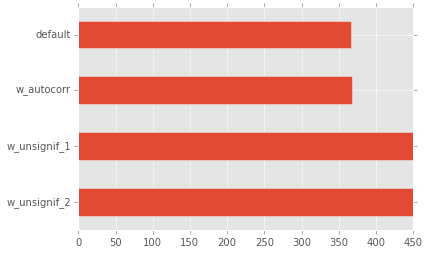

In [211]:
srmse = z.pd.Series(data=rmse.values(),index=rmse.keys())
srmse.sort(ascending=False)
srmse.plot(kind='barh');